In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib import colors
from scipy import stats

# --------------- IMPORTING THE DATA --------------- #

# Evacuation Data
evacdata1 = pd.read_csv('./output_new_new/test/overb0.2_tt1/gy-evac test1-table.csv', skiprows=6).sort_values(by=['ticks']).reset_index(drop=True)
evacdata2 = pd.read_csv('./output_new_new/test/overb0.11_tt0.5/gy-evac test2-table.csv', skiprows=6).sort_values(by=['ticks']).reset_index(drop=True)
evacdata3 = pd.read_csv('./output_new_new/test/overb0.2_tt0.5/gy-evac test3-table.csv', skiprows=6).sort_values(by=['ticks']).reset_index(drop=True)

# renaming the column to something that isn't cursed
evacdata1.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata1.rename(columns={'initial-people': 'population'}, inplace=True)
evacdata1.columns = evacdata1.columns.str.replace('-', '_')
# calculate time in minutes
evacdata1['time_minutes'] = evacdata1['ticks'] * evacdata1['tick_time_in_mins']

evacdata2.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata2.rename(columns={'initial-people': 'population'}, inplace=True)
evacdata2.columns = evacdata2.columns.str.replace('-', '_')
# calculate time in minutes
evacdata2['time_minutes'] = evacdata2['ticks'] * evacdata2['tick_time_in_mins']

evacdata3.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata3.rename(columns={'initial-people': 'population'}, inplace=True)
evacdata3.columns = evacdata3.columns.str.replace('-', '_')
# calculate time in minutes
evacdata3['time_minutes'] = evacdata3['ticks'] * evacdata3['tick_time_in_mins']



# # --------------------------------------------------------------------------
# # Journey Time Data
journey_metrics1 = pd.read_csv('./output_new_new/test/overb0.2_tt1/jm__p15000_evp0.3_tick1_max_walk_d1_term_d0.3_interval30.csv').sort_values(by=['start_tick']).reset_index(drop=True)
journey_metrics2 = pd.read_csv('./output_new_new/test/overb0.11_tt0.5/jm__p15000_evp0.3_tick0.5_max_walk_d1_term_d0.3_interval30.csv').sort_values(by=['start_tick']).reset_index(drop=True)
journey_metrics3 = pd.read_csv('./output_new_new/test/overb0.2_tt1/jm__p15000_evp0.3_tick1_max_walk_d1_term_d0.3_interval30.csv').sort_values(by=['start_tick']).reset_index(drop=True)

# calculate time in minutes
journey_metrics1['start_time_minutes'] = journey_metrics1['start_tick'] * 1 # 1 minutes per tick
journey_metrics2['start_time_minutes'] = journey_metrics2['start_tick'] * 0.5 # 0.5 minutes per tick
journey_metrics3['start_time_minutes'] = journey_metrics3['start_tick'] * 0.5 # 0.5 minutes per tick


# calculate normalised journey time
journey_metrics1['normalised_journey_time'] = journey_metrics1['actual_time'] / journey_metrics1['ideal_time']
journey_metrics2['normalised_journey_time'] = journey_metrics2['actual_time'] / journey_metrics2['ideal_time']
journey_metrics3['normalised_journey_time'] = journey_metrics3['actual_time'] / journey_metrics3['ideal_time']

# # calculate the mean normalised journey time every 30 minutes for each run
# # Bin the start_tick at intervals of 120 (corresponding to 30 minutes)
# journey_metrics['start_time_bin'] = pd.cut(journey_metrics['start_time_minutes'], bins=np.arange(-15, journey_metrics['start_tick'].max() + 45, 30))
# # Calculate the mean normalised journey time for each bin
# mean_normalised_journey_time_per_bin = journey_metrics.groupby('start_time_bin')['normalised_journey_time'].mean().reset_index()
# # Calculate the mean normalised journey time for each bin for each run
# mean_normalised_journey_time_per_bin_per_run = journey_metrics.groupby(['start_time_bin'])['normalised_journey_time'].mean().reset_index()

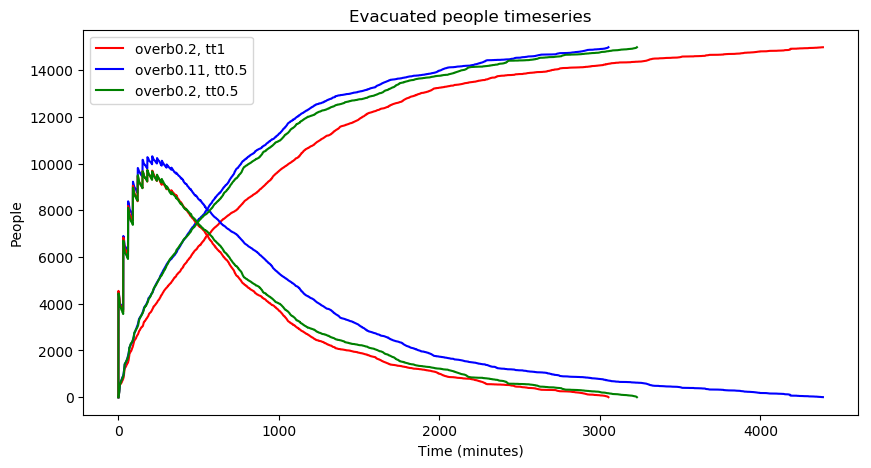

In [20]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(evacdata1['time_minutes'], evacdata1['get_no_evacuated'], label='overb0.2, tt1', color='r')
plt.plot(evacdata1['time_minutes'], evacdata1['get_no_evacuating'], color='b')

plt.plot(evacdata2['time_minutes'], evacdata2['get_no_evacuated'], label='overb0.11, tt0.5', color='b')
plt.plot(evacdata2['time_minutes'], evacdata2['get_no_evacuating'], color='r')

plt.plot(evacdata3['time_minutes'], evacdata3['get_no_evacuated'], label='overb0.2, tt0.5', color='g')
plt.plot(evacdata3['time_minutes'], evacdata3['get_no_evacuating'], color='g')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::2], labels[::2])
ax.set_title('Evacuated people timeseries')
ax.set_ylabel('People')
ax.set_xlabel('Time (minutes)')
#ax.set_xlim(0, 4000)

plt.show()

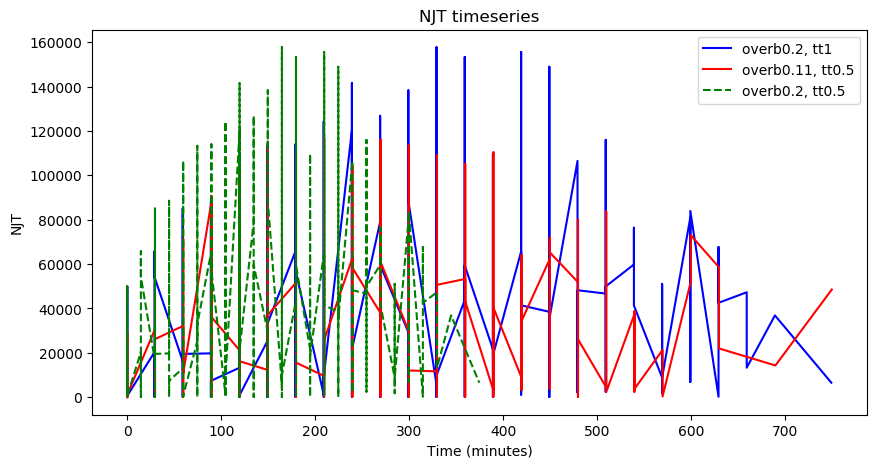

In [19]:
fig, ax =  plt.subplots(figsize=(10, 5))

ax.plot(journey_metrics1['start_time_minutes'], journey_metrics1['normalised_journey_time'], label='overb0.2, tt1', color='b')

ax.plot(journey_metrics2['start_time_minutes'], journey_metrics2['normalised_journey_time'], label='overb0.11, tt0.5', color='r')

ax.plot(journey_metrics3['start_time_minutes'], journey_metrics3
['normalised_journey_time'], label='overb0.2, tt0.5', color='g', linestyle = 'dashed')

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::2], labels[::2])
plt.legend()
ax.set_title('NJT timeseries')
ax.set_ylabel('NJT')
ax.set_xlabel('Time (minutes)')
#ax.set_xlim(0, 4000)

plt.show()